In [1]:
!pip install requests beautifulsoup4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup


In [2]:
# Getting of the information from the first web_site

url = "https://fred.stlouisfed.org/release/tables?rid=110&eid=257197&od=2022-01-01#"
response = requests.get(url)
print(response.status_code)
soup = BeautifulSoup(response.content, "html.parser")

average_income = soup.find_all('td', "fred-rls-elm-vl-td")[::3]
average_income_lists = [i.get_text().strip() for i in average_income]
average_income_lists
name_state = soup.find_all('span', class_="fred-rls-elm-nm")
name_state_lists = [i.get_text() for i in name_state]
name_state_lists
states = [i for i in name_state_lists]
incomes= [i for i in average_income_lists]
income_state_df = pd.DataFrame({'State': states,'Av_income': incomes,}).sort_values('State').reset_index(drop= True )
# dataframe with with states'names and average incom per capita
income_state_df

200


,State,Av_income
0,Alabama,"50,920"
1,Alaska,"68,664"
2,Arizona,"58,390"
3,Arkansas,"52,604"
4,California,"77,013"
5,Colorado,"75,708"
6,Connecticut,"83,340"
7,Delaware,"63,177"
8,District of Columbia,"96,092"
9,Florida,"64,804"


In [3]:
# Getting of the information from the second web_site
url = "https://worldpopulationreview.com/states"
response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")
type(soup)
soup.find("title")
print(response.status_code)
# state names
name_state = soup.find_all("td", class_="z-40 border px-2 py-0.5")[::8]
name_state_lists = [i.get_text().strip() for i in name_state][:50:]

# the last city has anither coding
last_city = soup.find_all("td", class_="z-40 border px-2 py-0.5")[407:412:]
last_city_lists = [i.get_text().strip() for i in last_city][0]
name_state_lists.append(last_city_lists)
# population
population = soup.find_all("td", class_="z-40 border px-2 py-0.5")[3::8]
population_lists = [i.get_text().strip() for i in population][:50:]
# population - the same as for the last city's name
last_population = soup.find_all("td", class_="z-40 border px-2 py-0.5")[407:412:]
last_population_lists = [i.get_text().strip() for i in last_city][3]
population_lists.append(last_population_lists)

name_state1 = []
population = []
states1 = [i for i in name_state_lists]
population = [i for i in population_lists]
population_df = pd.DataFrame({'State': states, 'Population': population}).sort_values('State').reset_index(drop= True )
# dataframe with states'names and population
population_df

200


,State,Population
0,Alabama,"38,965,193"
1,Alaska,"30,503,301"
2,Arizona,"22,610,726"
3,Arkansas,"19,571,216"
4,California,"12,961,683"
5,Colorado,"12,549,689"
6,Connecticut,"11,785,935"
7,Delaware,"11,029,227"
8,District of Columbia,"10,835,491"
9,Florida,"10,037,261"


In [4]:
# importing a database from  kaggle
dfdb = pd.read_csv("data/linkedin-jobs-usa.csv", low_memory=False)
# fixing the salary column take off the simbols ect..
salary_values = dfdb['salary'].str.split('-', expand=True)
lower_salary = salary_values[0].str.replace('[^\d.]', '', regex=True).astype(float)
upper_salary = salary_values[1].str.replace('[^\d.]', '', regex=True).astype(float)

#finding the average of this two numbers
average = (upper_salary + lower_salary)/2
dfdb['salary'] = average.round()
dfdb.head()

,title,company,description,onsite_remote,salary,location,criteria,posted_date,link
0,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,Buffalo-Niagara Falls Area,"[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
1,Data Analyst - Recent Graduate,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"San Jose, CA","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-22,https://www.linkedin.com/jobs/view/data-analys...
2,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Texas, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
3,Data Analyst,PayPal,"At PayPal (NASDAQ: PYPL), we believe that ever...",onsite,NaN,"Illinois, United States","[{'Seniority level': 'Not Applicable'}, {'Empl...",2022-11-17,https://www.linkedin.com/jobs/view/data-analys...
4,Entry-Level Data Analyst,The Federal Savings Bank,"The Federal Savings Bank, a national bank and ...",onsite,NaN,"Chicago, IL","[{'Seniority level': 'Entry level'}, {'Employm...",2022-11-17,https://www.linkedin.com/jobs/view/entry-level...


In [5]:
# repacing values in salary column becsuse there are to many mistakes
dict_salary ={55.0 : 55000,
              70.0 : 70000,
              50.0 : 50000,
              32.0 : 32000,
              60.0 : 60000,
              30.0 : 30000,
              23.0 : 45000,
              45.0 : 45000,
              42.0 : 42000,
              5900.0 : 59000,
              29.0 : 29000,
              35.0 : 35000,
              36.0 :36000,
              40.0 :40000,
              69.0 :69000
              }
dfdb.salary = dfdb.salary.replace(dict_salary)

dfdb.salary.mean()
# filling some null values

dfdb.title.fillna("Junior Data Analyst", inplace = True)

dfdb.isnull().any()

dfdb.title.value_counts()
# fixing the job titles

title_mapping = {
    "Data Visualization": "Data Visualization",
    "Junior": "Junior Data Analyst",
    "Data and Analytics": "Data and Analytics",
    "Associate Data Analyst": "Associate Data Analyst",
    "Business Data Analyst": "Business Data Analyst",
    "Consultant": "Consultant",
    "Global Remote": "Remote Data Analyst",
    "Hybrid": "Hybrid Data Analyst",
    "Remote": "Remote Data Analyst",
    "SQL": "SQL Data Analyst",
    "Energy": "Energy Data Analyst",
    "Recent Graduate": "Recent Graduate Data Analyst",
    "Weekly Hybrid Remote/Onsite Schedule": "Hybrid Data Analyst",
    "Collector": "Collector Data Analyst",
    "Data Analytics": "Data Analytics Analyst",
    "Marketing": "Marketing Data Analyst",
    "SQL, Operations": "SQL Data Analyst",
    "Senior": "Senior Data Analyst",
    "Entry Level": "Entry Level Data Analyst",
    "Data Analyst": "Data Analyst"
}


def map_job_title(title):
    for key, value in title_mapping.items():
        if key.lower() in title.lower():
            return value
    return title


updated_title = dfdb["title"].apply(map_job_title)
dfdb["title"] = updated_title
#finding the average  salary for each title of job
average_salary_by_title = dfdb.groupby("title")['salary'].mean()
#fixing satetes because some of them have just the prefixes
state_mapping_full = {
    "United States": "United States",
    "New York City Metropolitan Area": "New York",
    "Chicago, IL": "Illinois",
    "New York, NY": "New York",
    "Austin, TX": "Texas",
    "Texas, United States": "Texas",
    "Timonium, MD": "Maryland",
    "Dallas, TX": "Texas",
    "Boston, MA": "Massachusetts",
    "Charlotte, NC": "North Carolina",
    "Miami, FL": "Florida",
    "New York, United States": "New York",
    "Franklin, TN": "Tennessee",
    "Tempe, AZ": "Arizona",
    "Illinois, United States": "Illinois",
    "Greensboro--Winston-Salem--High Point Area": "North Carolina",
    "Greater Scranton Area": "Pennsylvania",
    "Tennessee, United States": "Tennessee",
    "Indiana, United States": "Indiana",
    "Denver Metropolitan Area": "Colorado",
    "District of Columbia, United States": "District of Columbia",
    "Conshohocken, PA": "Pennsylvania",
    "Phoenix, AZ": "Arizona",
    "North Carolina, United States": "North Carolina",
    "Greater Sacramento": "California",
    "Richfield, MN": "Minnesota",
    "Morgan Hill, CA": "California",
    "Cincinnati Metropolitan Area": "Ohio",
    "Hartford, CT": "Connecticut",
    "Atlanta Metropolitan Area": "Georgia",
    "Quincy, MA": "Massachusetts",
    "Buffalo-Niagara Falls Area": "New York",
    "San Francisco, CA": "California",
    "Irvine, CA": "California",
    "Houston, TX": "Texas",
    "Omaha, NE": "Nebraska",
    "San Jose, CA": "California",
    "Scottsdale, AZ": "Arizona",
    "San Francisco Bay Area": "California",
    "Manassas, VA": "Virginia"
}


dfdb['location'] = dfdb['location'].map(state_mapping_full)
# replacing the result for the usa in other values
state_counts = dfdb["location"].value_counts()
total_count = state_counts.sum() - state_counts["United States"]
ratios = state_counts / total_count
replacements = (dfdb["location"].value_counts()["United States"] * ratios).round().astype(int)
print(replacements)
for i, location in enumerate(dfdb["location"]):
    if location == "United States":
        for key, value in replacements.items():
            if value > 0 and key != "United States":
                dfdb.at[i, "location"] = key
                replacements[key] -= 1
                break


dfdb.groupby("location")["salary"].mean()

data = {
    "State": ["Arizona", "California", "Colorado", "Connecticut", "District of Columbia",
                 "Florida", "Georgia", "Illinois", "Indiana", "Maryland", "Massachusetts",
                 "Minnesota", "Nebraska", "New York", "North Carolina", "Ohio", 
                 "Pennsylvania", "Tennessee", "Texas"],
    "Av_salary": [81431.818182, 70408.450704, 40411.111111, 89375.000000, 117546.511628,
               86250.000000, 81888.888889, 86000.000000, 103750.000000, 86363.636364,
               82700.000000, 50583.333333, 95000.000000, 72483.673469, 69901.639344,
               71000.000000, 86603.829787, 102305.555556, 83276.595745],
    "Number_of_Vac": [135, 251, 49, 47, 49, 54, 46, 258, 50, 82, 119, 47, 41, 475, 153, 47, 97, 101, 302]
}
# thats the dataframe  that groups the columns that we want to compare
result_df = pd.DataFrame(data)
df_by_title = dfdb.groupby(["location", "title"]).agg({"salary": "mean"}).reset_index()

location
United States           221
New York                123
Texas                    78
Illinois                 67
California               65
North Carolina           40
Arizona                  35
Massachusetts            31
Tennessee                26
Pennsylvania             25
Maryland                 21
Florida                  14
Indiana                  13
Colorado                 13
District of Columbia     13
Ohio                     12
Minnesota                12
Connecticut              12
Georgia                  12
Nebraska                 11
Virginia                  9
Name: count, dtype: int32


In [6]:
import numpy as np
# database with states'names, population and income per capita
merged_df = pd.merge(population_df, income_state_df, on='State', how='left')
# database with states'names, population,income per capita and number of vacancies
merged_df = pd.merge(merged_df, result_df, on='State', how='left')
merged_df['Population'] = merged_df['Population'].str.replace(',', '').astype(int)
merged_df['Population'] = (merged_df['Population']/1000000).round(2)

# formatting of the Av_income column
merged_df['Av_income'] = merged_df['Av_income'].str.replace(',', '').astype(int)
merged_df

,State,Population,Av_income,Av_salary,Number_of_Vac
0,Alabama,38.97,50920,NaN,NaN
1,Alaska,30.50,68664,NaN,NaN
2,Arizona,22.61,58390,81431.818182,135.0
3,Arkansas,19.57,52604,NaN,NaN
4,California,12.96,77013,70408.450704,251.0
5,Colorado,12.55,75708,40411.111111,49.0
6,Connecticut,11.79,83340,89375.000000,47.0
7,Delaware,11.03,63177,NaN,NaN
8,District of Columbia,10.84,96092,117546.511628,49.0
9,Florida,10.04,64804,86250.000000,54.0


In [7]:
# data cleaning
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(how='any', inplace=True)
merged_df

,State,Population,Av_income,Av_salary,Number_of_Vac
2,Arizona,22.61,58390,81431.818182,135.0
4,California,12.96,77013,70408.450704,251.0
5,Colorado,12.55,75708,40411.111111,49.0
6,Connecticut,11.79,83340,89375.000000,47.0
8,District of Columbia,10.84,96092,117546.511628,49.0
9,Florida,10.04,64804,86250.000000,54.0
10,Georgia,9.29,56588,81888.888889,46.0
13,Illinois,7.43,67653,86000.000000,258.0
14,Indiana,7.13,58329,103750.000000,50.0
20,Maryland,5.88,70236,86363.636364,82.0


In [8]:
# sorting
merged_df.reset_index(drop= True )
merged_df.dropna(how='any', inplace=True)
merged_df

,State,Population,Av_income,Av_salary,Number_of_Vac
2,Arizona,22.61,58390,81431.818182,135.0
4,California,12.96,77013,70408.450704,251.0
5,Colorado,12.55,75708,40411.111111,49.0
6,Connecticut,11.79,83340,89375.000000,47.0
8,District of Columbia,10.84,96092,117546.511628,49.0
9,Florida,10.04,64804,86250.000000,54.0
10,Georgia,9.29,56588,81888.888889,46.0
13,Illinois,7.43,67653,86000.000000,258.0
14,Indiana,7.13,58329,103750.000000,50.0
20,Maryland,5.88,70236,86363.636364,82.0


In [9]:
# computing Vacancies/Population and Av_salary/Av_income
merged_df['Vacancies/Population'] = merged_df['Number_of_Vac']/merged_df['Population']
merged_df['Av_salary/Av_income'] = (merged_df['Av_salary']/merged_df['Av_income'])*100
merged_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
2,Arizona,22.61,58390,81431.818182,135.0,5.970809,139.461925
4,California,12.96,77013,70408.450704,251.0,19.367284,91.424111
5,Colorado,12.55,75708,40411.111111,49.0,3.904382,53.377597
6,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.241421
8,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.327053
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.093636
10,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.710696
13,Illinois,7.43,67653,86000.000000,258.0,34.724092,127.119270
14,Indiana,7.13,58329,103750.000000,50.0,7.012623,177.870356
20,Maryland,5.88,70236,86363.636364,82.0,13.945578,122.962066


In [10]:
#  sorting and formating 
merged_df['Vacancies/Population'] = merged_df['Vacancies/Population'].astype(float)
merged_df['Vacancies/Population'] = merged_df['Vacancies/Population'].map(lambda x: round(x, 6))
merged_df['Av_salary/Av_income'] = merged_df['Av_salary/Av_income'].map("{:.2f}%".format)

merged_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
2,Arizona,22.61,58390,81431.818182,135.0,5.970809,139.46%
4,California,12.96,77013,70408.450704,251.0,19.367284,91.42%
5,Colorado,12.55,75708,40411.111111,49.0,3.904382,53.38%
6,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.24%
8,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.33%
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.09%
10,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
13,Illinois,7.43,67653,86000.000000,258.0,34.724092,127.12%
14,Indiana,7.13,58329,103750.000000,50.0,7.012623,177.87%
20,Maryland,5.88,70236,86363.636364,82.0,13.945578,122.96%


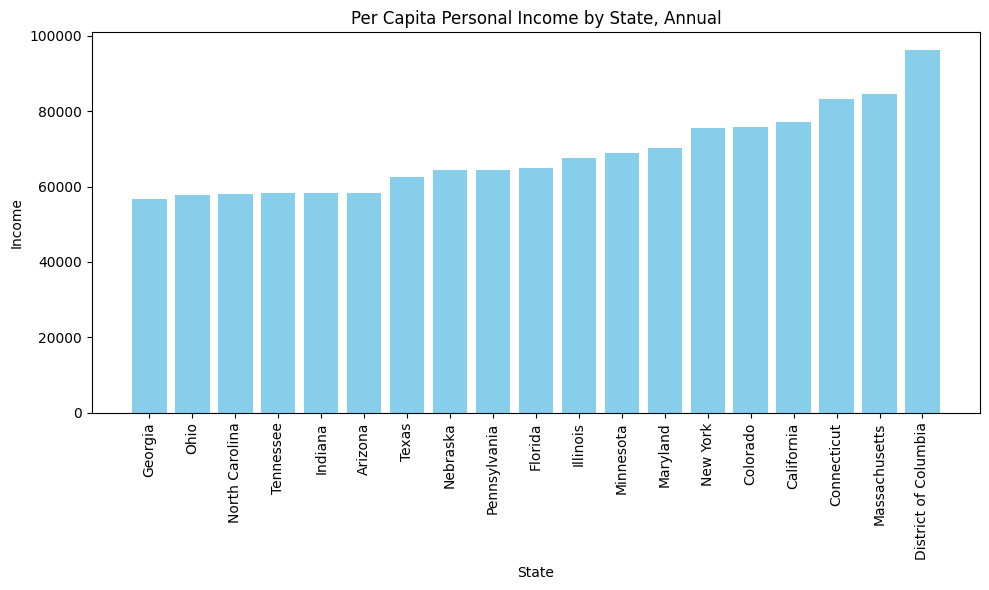

In [11]:
#this barchart shows the comparing the average income per state and average salary of working in data analysis whatever is the field
sorted_df = merged_df.sort_values(by='Av_income')
plt.figure(figsize=(10, 6))
plt.bar(sorted_df['State'], sorted_df['Av_income'], color='skyblue')
plt.title('Per Capita Personal Income by State, Annual')
plt.xlabel('State')
plt.ylabel('Income')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

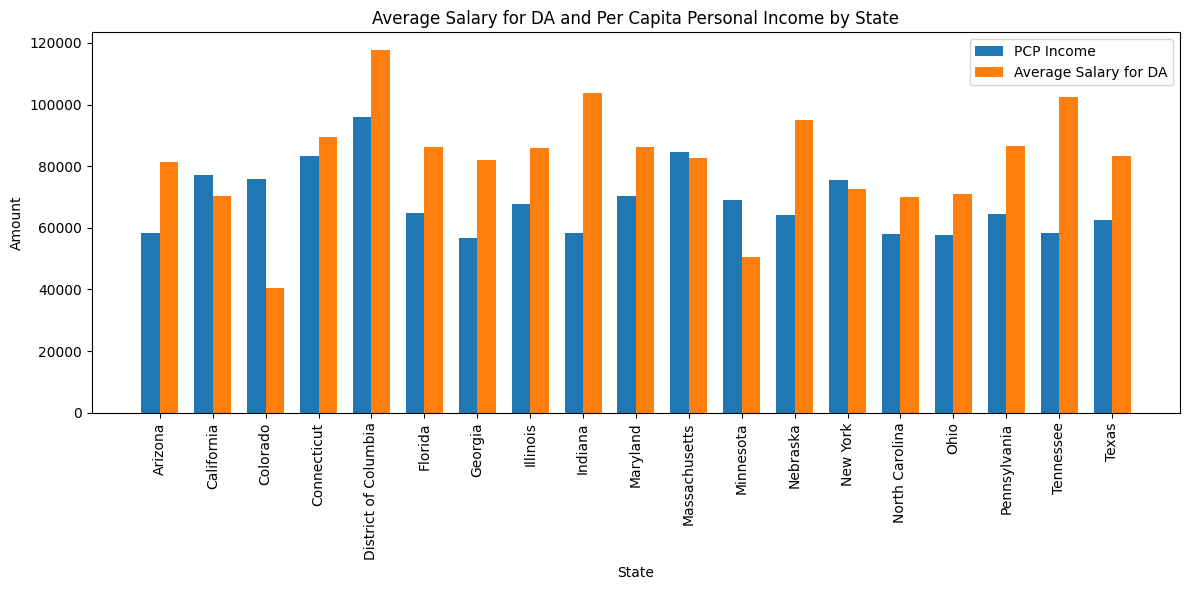

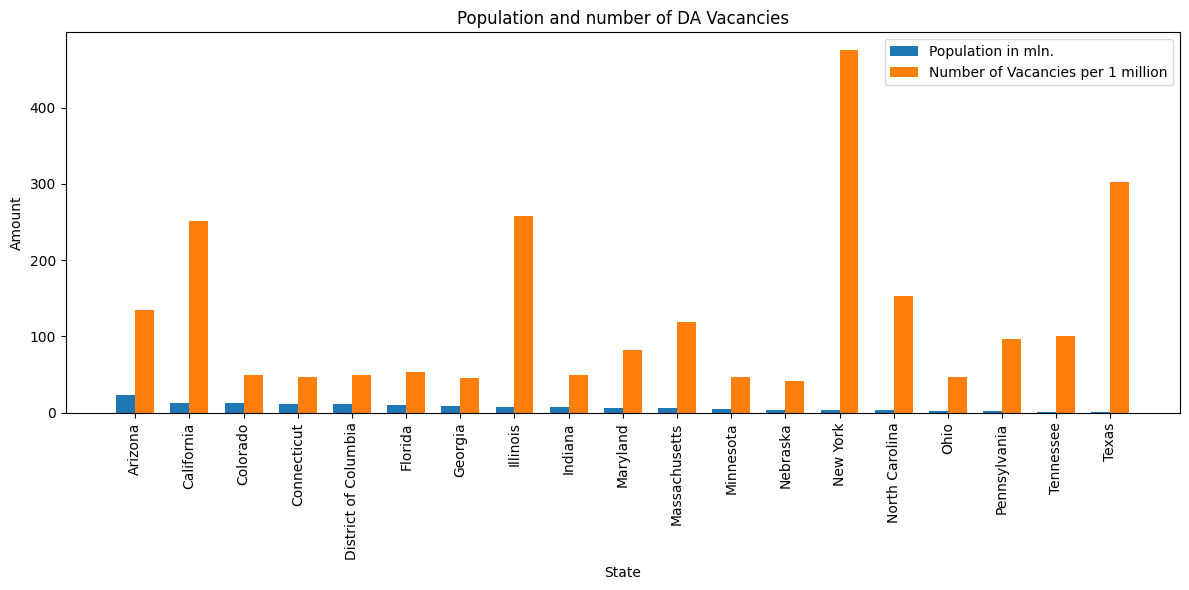

In [12]:
# diagram 1: Average Salary for DA and Per Capita Personal Income by State
bar_width = 0.35
index = range(len(merged_df))
plt.figure(figsize=(12, 6))
plt.bar(index, merged_df['Av_income'], bar_width, label='PCP Income')
plt.bar([i + bar_width for i in index], merged_df['Av_salary'], bar_width, label='Average Salary for DA')
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Average Salary for DA and Per Capita Personal Income by State')
plt.xticks([i + bar_width/2 for i in index], merged_df['State'])
plt.xticks(rotation=90)
plt.legend()
plt.savefig('Average Salary for DA and Per Capita Personal Income by State')
plt.tight_layout()
plt.show()
##############################################################
# diagram 2: Population and number of DA Vacancies
bar_width = 0.35
index = range(len(merged_df))
plt.figure(figsize=(12, 6))
plt.bar(index, merged_df['Population'], bar_width, label='Population in mln.')
plt.bar([i + bar_width for i in index], merged_df['Number_of_Vac'], bar_width, label='Number of Vacancies per 1 million')
plt.xlabel('State')
plt.ylabel('Amount')
plt.title('Population and number of DA Vacancies')
plt.xticks([i + bar_width/2 for i in index], merged_df['State'])
plt.xticks(rotation=90)
plt.legend()
plt.savefig('Population and number of DA Vacancies')
plt.tight_layout()
plt.show()

In [13]:
# creating a database to determine the best states for the DA step1: sorting
Av_income_sort_df = merged_df.sort_values(by='Av_income')
Vac_pop_sort_df = merged_df.sort_values(by='Vacancies/Population')
Sal_income_sort_df = merged_df.sort_values(by='Av_salary/Av_income')
Av_income_sort_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
10,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
35,Ohio,2.11,57759,71000.000000,47.0,22.274882,122.92%
33,North Carolina,2.94,58125,69901.639344,153.0,52.040816,120.26%
42,Tennessee,1.13,58311,102305.555556,101.0,89.380531,175.45%
14,Indiana,7.13,58329,103750.000000,50.0,7.012623,177.87%
2,Arizona,22.61,58390,81431.818182,135.0,5.970809,139.46%
43,Texas,1.10,62585,83276.595745,302.0,274.545455,133.06%
27,Nebraska,4.05,64263,95000.000000,41.0,10.123457,147.83%
38,Pennsylvania,1.77,64506,86603.829787,97.0,54.802260,134.26%
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.09%


In [14]:
Vac_pop_sort_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
5,Colorado,12.55,75708,40411.111111,49.0,3.904382,53.38%
6,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.24%
8,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.33%
10,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.09%
2,Arizona,22.61,58390,81431.818182,135.0,5.970809,139.46%
14,Indiana,7.13,58329,103750.000000,50.0,7.012623,177.87%
23,Minnesota,5.11,68874,50583.333333,47.0,9.197652,73.44%
27,Nebraska,4.05,64263,95000.000000,41.0,10.123457,147.83%
20,Maryland,5.88,70236,86363.636364,82.0,13.945578,122.96%


In [15]:
Sal_income_sort_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
6,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.24%
33,North Carolina,2.94,58125,69901.639344,153.0,52.040816,120.26%
8,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.33%
35,Ohio,2.11,57759,71000.000000,47.0,22.274882,122.92%
20,Maryland,5.88,70236,86363.636364,82.0,13.945578,122.96%
13,Illinois,7.43,67653,86000.000000,258.0,34.724092,127.12%
43,Texas,1.10,62585,83276.595745,302.0,274.545455,133.06%
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.09%
38,Pennsylvania,1.77,64506,86603.829787,97.0,54.802260,134.26%
2,Arizona,22.61,58390,81431.818182,135.0,5.970809,139.46%


In [16]:
# creating a database to determine the best states for the DA step2: three df with the first 5 cities
set1_subset  = Av_income_sort_df.head(5)
set2_subset  = Vac_pop_sort_df.head(5)
set3_subset  = Sal_income_sort_df.head(5)

In [17]:
# creating a database to determine the best states for the DA step2: new df
out_come_df = pd.DataFrame()
out_come_df = pd.concat([set1_subset , set2_subset , set3_subset], ignore_index=True)
out_come_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
0,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
1,Ohio,2.11,57759,71000.000000,47.0,22.274882,122.92%
2,North Carolina,2.94,58125,69901.639344,153.0,52.040816,120.26%
3,Tennessee,1.13,58311,102305.555556,101.0,89.380531,175.45%
4,Indiana,7.13,58329,103750.000000,50.0,7.012623,177.87%
5,Colorado,12.55,75708,40411.111111,49.0,3.904382,53.38%
6,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.24%
7,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.33%
8,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
9,Florida,10.04,64804,86250.000000,54.0,5.378486,133.09%


In [18]:
# the number of occurrences of a state in the database
state_counts = out_come_df['State'].value_counts()
state_rating_dict = state_counts.to_dict()
state_rating_dict

{'Georgia': 2,
 'Ohio': 2,
 'North Carolina': 2,
 'Connecticut': 2,
 'District of Columbia': 2,
 'Tennessee': 1,
 'Indiana': 1,
 'Colorado': 1,
 'Florida': 1,
 'Maryland': 1}

In [19]:
# collecting the data for the best 5 states
top_five_states = list(state_rating_dict.keys())[:5]
best_choice_df = merged_df[merged_df['State'].isin(top_five_states)]

In [20]:
# the outcome
last_df = best_choice_df.sort_values(by=['Vacancies/Population', 'Av_salary/Av_income', 'Av_salary'], ascending=[False, False, False]).reset_index(drop= True )
last_df

,State,Population,Av_income,Av_salary,Number_of_Vac,Vacancies/Population,Av_salary/Av_income
0,North Carolina,2.94,58125,69901.639344,153.0,52.040816,120.26%
1,Ohio,2.11,57759,71000.000000,47.0,22.274882,122.92%
2,Georgia,9.29,56588,81888.888889,46.0,4.951561,144.71%
3,District of Columbia,10.84,96092,117546.511628,49.0,4.520295,122.33%
4,Connecticut,11.79,83340,89375.000000,47.0,3.986429,107.24%


In [21]:
# changing the population from 1 mln to 100 th.
last_df['Population'] = last_df['Population']/10

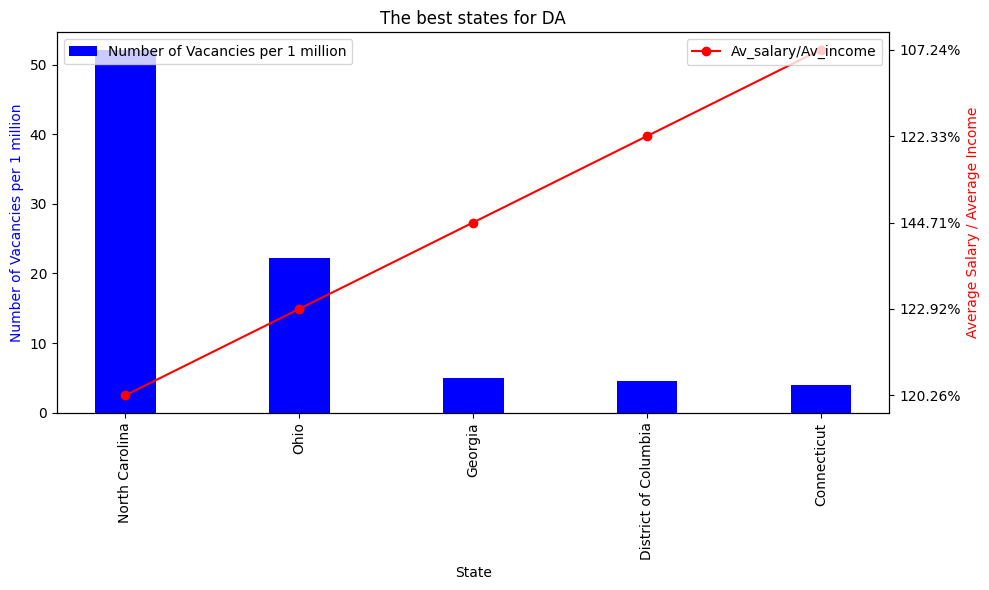

In [22]:
# diagramm for states rating
index = range(len(last_df))
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(index, last_df['Vacancies/Population'], bar_width, label='Number of Vacancies per 1 million', color='b')
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Vacancies per 1 million', color='b')
ax1.set_title('The best states for DA')
ax1.set_xticks(index)
ax1.set_xticklabels(last_df['State'], rotation=90)
ax1.legend(loc='upper left')
ax2 = ax1.twinx()
ax2.plot(index, last_df['Av_salary/Av_income'], color='r', marker='o', label='Av_salary/Av_income')
ax2.set_ylabel('Average Salary / Average Income', color='r')
ax2.legend(loc='upper right')
plt.savefig('The_best_states_for_DA.png')
plt.tight_layout()
plt.show()


In [29]:
ai_df = merged_df[["State","Av_income"]]

ai_df = ai_df.rename(columns={"State":"location","Av_income":"salary"})

title_and_avg = pd.concat([ai_df,df_by_title])

title_avg = title_and_avg.sort_values("location")

In [30]:
title_avg 

,location,salary,title
2,Arizona,58390.0,NaN
5,Arizona,70000.0,SQL Data Analyst
3,Arizona,NaN,Entry Level Data Analyst
2,Arizona,NaN,Data and Analytics
1,Arizona,85000.0,Data Visualization
...,...,...,...
94,Texas,NaN,Junior Data Analyst
95,Texas,NaN,Remote Data Analyst
96,Texas,67500.0,SQL Data Analyst
97,Virginia,140000.0,Data Analyst


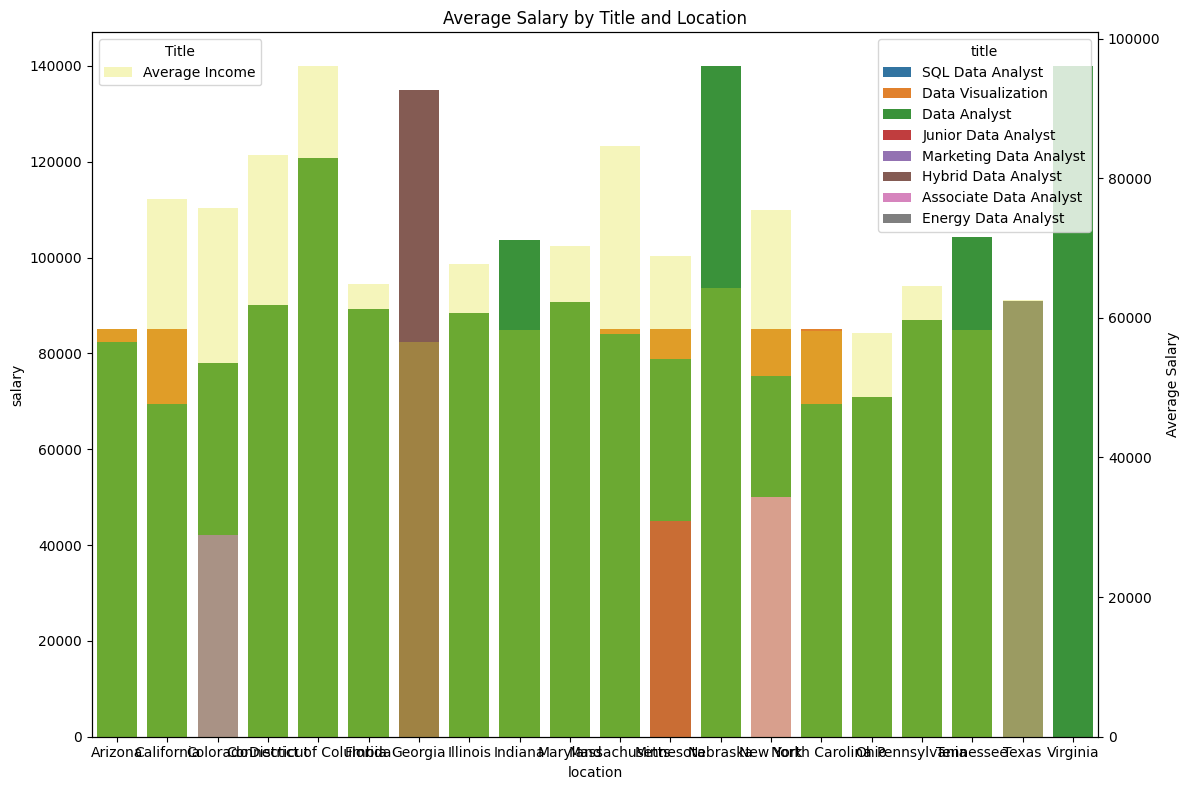

In [38]:
title_avg = title_avg.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
title_avg_clean = title_avg.dropna(subset=['salary', 'title'])
plt.figure(figsize=(12, 8))
sns.barplot(data=title_avg_clean, x='location', y='salary', hue='title', dodge=False)
ax = plt.gca().twinx()
sns.barplot(data=merged_df, x='State', y='Av_income', saturation=0.75, alpha=0.3, color='yellow', label='Average Income', ax=ax)
plt.title('Average Salary by Title and Location')
plt.xlabel('Location')
plt.ylabel('Average Salary')
plt.xticks(rotation=45)  # Поворот оси x на 45 градусов
plt.legend(title='Title', loc='upper left')
plt.tight_layout()
plt.show()